# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## 1. Загрузка и подготовка данных

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from scipy import stats as st

In [2]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
display(geo_0.head())
print(geo_0.shape)
geo_0.info()
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
display(geo_1.head())
print(geo_1.shape)
geo_1.info()
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(geo_2.head())
print(geo_2.shape)
geo_2.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
display(geo_0.describe().transpose())
display(geo_1.describe().transpose())
display(geo_2.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


In [4]:
print('Явных дубликатов в geo_0:', (geo_0.duplicated().sum()))
print('Явных дубликатов в geo_1:', (geo_0.duplicated().sum()))
print('Явных дубликатов в geo_2:', (geo_0.duplicated().sum()))


Явных дубликатов в geo_0: 0
Явных дубликатов в geo_1: 0
Явных дубликатов в geo_2: 0


### 1.1 Описание данных:

•	id — уникальный идентификатор скважины 
•	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

•	product — объём запасов в скважине (тыс. баррелей).

Условия задачи:

•	Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

•	При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

•	Бюджет на разработку скважин в регионе — 10 млрд рублей.

•	При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс.
рублей, поскольку объём указан в тысячах баррелей.

•	После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

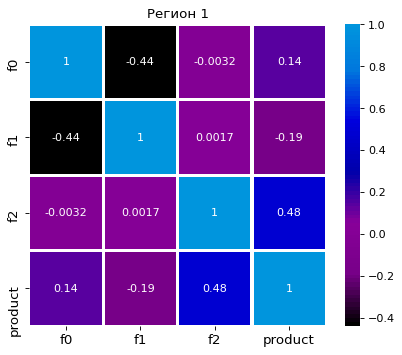

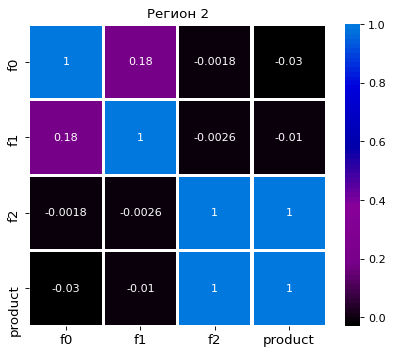

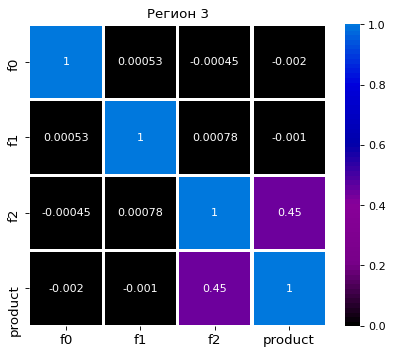

In [5]:
def make_heat_map(data_geo, name):
# Plot 
    plt.figure(figsize=(6.0,5.0), dpi= 80)
    sns.heatmap(
        data_geo.corr(),
        xticklabels=data_geo.corr().columns,
        yticklabels=data_geo.corr().columns,
        cmap='nipy_spectral',
        center=2,
        annot=True,
        linewidths=2,
        linecolor='white'
    )

# Decorations
    plt.title(name, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

reg_0 = make_heat_map(geo_0, 'Регион 1')
reg_1 = make_heat_map(geo_1, 'Регион 2')
reg_2 = make_heat_map(geo_2, 'Регион 3')

**Вывод:**


Во всех трех датасетах отсутствуют пропущенные значения и дубликаты. В каждом из датасетов, Целевой признак - **'product'** c числовым типом данных.

Для всех датасетов средние близки к медианным значениям, значит значительных выбросов в данных нет.

Корреляция между признаками . 

Тепловая карта "Регион 2" демонстрирует прямую зависимость целевого от признака f2, которая означает, что объем нефти в данном регионе напрямую определяется признаком f2. 

Корреляция между признаками (f0, f1 , f2) не достигает 0,6, речи о мультколлинеарности нет.Все признаки остаются на месте.

**id** — уникальный идентификатор скважины — порядковый тип данных -  полежит уделению, т.к. для прогноза не нужен.

### 1.2 Подготовка данных

Ниже создана функция, которая принимает на вход датасеты по регионам, разделяет их на **target** и **features**, удаляет колонку **id**, разделяет выборки на тренировочную и валидационные, проводит масштабирование численных признаков.


In [6]:
def make_split_scal_data(data_geo):
    
    target_column = 'product'
    target = data_geo[target_column]
    features = data_geo.drop(target_column, axis=1)
    features = features.drop('id', axis=1)
    
    
    # Разделение выборок:
    rand_state = 12345
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=rand_state)
    
    
    # Масштабирование численных признаков методом стандартизации данных:
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    
    
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    
    return features_train, features_valid, target_train, target_valid

# Применение функции features и target для 3-х регионов:
features_train_0, features_valid_0, target_train_0, target_valid_0 = make_split_scal_data(geo_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = make_split_scal_data(geo_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = make_split_scal_data(geo_2)
# Проверка работы функции:
print('Разделение:')
print(features_train_0.shape)
print(features_valid_0.shape)
print(target_train_0.shape)
print(target_valid_0.shape)
print('Масштабирование')
features_train_0.describe().transpose()

Разделение:
(75000, 3)
(25000, 3)
(75000,)
(25000,)
Масштабирование


,count,mean,std,min,25%,50%,75%,max
f0,75000.0,1.680907e-16,1.000007,-2.186288,-0.657554,0.001879,0.657118,2.139081
f1,75000.0,-3.474554e-17,1.000007,-2.178269,-0.892534,-0.000741,0.892851,2.169192
f2,75000.0,6.442254e-18,1.000007,-3.890945,-0.679958,0.004289,0.682975,4.153623


## 2. Обучение и проверка модели

In [7]:
# инициализация модели:
model = LinearRegression()
    
def train_and_predict(features_train, features_valid, target_train, target_valid):
    
    
    # обучение:
    model.fit(features_train, target_train)  
    # расчёт предсказаний на валидационной выборке
    predictions_valid = pd.Series(model.predict(features_valid))
    predicted_mean = predictions_valid.mean()
    result_rmse = (mean_squared_error(target_valid, predictions_valid) ** 0.5)

    return predictions_valid, predicted_mean, result_rmse


predictions_valid_0, predicted_mean_0, result_rmse_0 = train_and_predict(features_train_0, features_valid_0, target_train_0, target_valid_0)
predictions_valid_1, predicted_mean_1, result_rmse_1 = train_and_predict(features_train_1, features_valid_1, target_train_1, target_valid_1)
predictions_valid_2, predicted_mean_2, result_rmse_2 = train_and_predict(features_train_2, features_valid_2, target_train_2, target_valid_2)

predicted_mean_0
dates = {
    'Регион 1': [predictions_valid_0, predicted_mean_0, result_rmse_0, target_valid_0],
    'Регион 2': [predictions_valid_1, predicted_mean_1, result_rmse_1, target_valid_1],
    'Регион 3': [predictions_valid_2, predicted_mean_2, result_rmse_2, target_valid_2]
}


for name, data in dates.items():
    _, predicted_mean, result_rmse, target_valid = data
    true_mean_stock_raw = target_valid.mean()
    print(f'Для {name}: RMSE=  {round(result_rmse, 2)}, Предсказанный средний запас сырья = {round(predicted_mean, 2)},'
          f' истиный средний запас= {round(true_mean_stock_raw, 2)}')  

Для Регион 1: RMSE=  37.58, Предсказанный средний запас сырья = 92.59, истиный средний запас= 92.08
Для Регион 2: RMSE=  0.89, Предсказанный средний запас сырья = 68.73, истиный средний запас= 68.72
Для Регион 3: RMSE=  40.03, Предсказанный средний запас сырья = 94.97, истиный средний запас= 94.88


**Вывод:**

Наилучшими прогнозными свойствами обладает Регион 1 , RMSE=  0.89. т.к. признак f2 имеет прямую зависимость с целевым признаком и определяет поведение модели. 

Истинные средние запасы отличаются от предсказанных всего на несколько сотых, то есть очень близки.

Предсказательные способности моделей для 1 и 3 регионов приктически одинаковы(согласно параметрам RMSE).

## 3. Подготовка к расчёту прибыли

In [8]:
# создание констант
explore_point_count = 500 # количество исследуемых точек при разведке региона
best_point_count = 200 # количество  лучших точек из исследуемых для разработки
budget_for_region = 10000 # Бюджет на разработку скважин в регионе (млн.руб.)
revenue_1k_barrel = 0.45 # доход с 1 тыс баррель (млн.руб.)
loss_probability = 0.025 # максимальная вероятность убытков
bootstrap_samples = 1000 # количество повторений псевдовыборок

In [9]:
# Расчет минимального среднего количества продукта в месторождениях региона, достаточное для разработки
min_product_for_budget = budget_for_region / best_point_count / revenue_1k_barrel
print(f'Минимальное количество добычи нефти в скважине = {round(min_product_for_budget, 2)} тыс. баррелей.')

Минимальное количество добычи нефти в скважине = 111.11 тыс. баррелей.


In [10]:
#  функция расчёта прибыли на валидационной выборке, c 200 кважин с максимальным количеством запасов:
def profit_200(target_valid, predictions_valid):
    
    pred_best_point = predictions_valid.sort_values(ascending=False).head(best_point_count)
    target_best_point = target_valid.reset_index(drop=True)[pred_best_point.index]

    revenue_total = target_best_point.sum() * revenue_1k_barrel # доход в млн. рублей с 200 скважин
    profit = revenue_total - budget_for_region

    return profit


print(f'Прибыль по регионам с 200 лучших скважин(выборка из 25000 скважин)')
print(f'Регион 1: {round(profit_200(target_valid_0, predictions_valid_0))} млн.руб.')
print(f'Регион 2: {round(profit_200(target_valid_1, predictions_valid_1))} млн.руб.')
print(f'Регион 3: {round(profit_200(target_valid_2, predictions_valid_2))} млн.руб.')


Прибыль по регионам с 200 лучших скважин(выборка из 25000 скважин)
Регион 1: 3321 млн.руб.
Регион 2: 2415 млн.руб.
Регион 3: 2710 млн.руб.


## 4. Расчёт прибыли и рисков 

In [11]:
#  функция расчёта выручки на валидационной выборке, cо  случайным количеством скважин :
def revenue (target_valid, predictions_valid, best_point_count):
    
    probs_sort = predictions_valid.sort_values(ascending=False) 
    
    # извлечение объектов с одними и теми же индексами (истиные значения)
    target_cel = target_valid[probs_sort.index][:best_point_count]
    rev = target_cel.sum() * revenue_1k_barrel # доход (выручка) в млн. рублей
    return rev

Определим распределение прибыли с помощью техники Bootstrap для 1000 выборок каждого региона, при случайном выборе 500 скважин.
    Ниже создана функция, которя получает на вход: список вероятностей predictions_valid — предсказного количества запасов в скважине; список ответов target_valid — истиного количества запасов; количество повторений псевдовыборок;требуемое количество скважин.
    
   Внутри каждой подвыборки, функция расчитывает прибыль и оценивает первую на убыточность, формирует список распределения выручки **values**, определяет среднюю прибыль **mean**  для регионов, доверительный интервал **confidence_interval** и вероятность получить отрицательную выручку **p_value**.

In [12]:
def income_distribution (predictions_valid, target_valid, bootstrap_samples, explore_point_count):
    state = RandomState(12345)
    # расчет количества убыточных скважин
    count = 0 
    # список значений прибыли для 1000 выборок
    values = [] 

    for i in range(bootstrap_samples): # создаем 1000 выборок

        #сброс индексов и случайный выбор исследуемого количества скважин 500
        target_subsample = target_valid.reset_index(drop=True).sample(explore_point_count, replace=True, random_state=state)

        # отбор строк из предсказаний, соответствующих индексу отобранных строк целевого признака
        probs_subsample = predictions_valid[target_subsample.index]

        # расчет прибыли для отобранных строк,для необходимого количества скважин с наибольшим запасом сырья 200
        profit = revenue(target_subsample, probs_subsample, best_point_count) - budget_for_region
        
        # прибыль в список 
        values.append(profit)

        # проверка подвыборки на  убыточность
        if profit < 0:
            count +=1
            
    print('count =', count)
    print()
    
    values = pd.Series(values)
    display(values.head(), values.tail())
    print()
    
    mean = values.mean()
    print("Среднее значение прибыли:", round(mean, 2), 'млн. рублей')
    print()
    
    # 1-й способ:
    # confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), np.std(values, ddof=1))
    
    # 2-й способ:
    # confidence_interval = st.t.interval(
    # 0.95, len(values)-1, values.mean(), values.sem())
    
    # 3-й способ:    
    lower = values.quantile(0.025)
    apper = values.quantile(.975)
    
    
    # print("95%-ый доверительный интервал:", confidence_interval)
    print(f'95%-ый доверительный интервал:( {lower}, {apper} )')
    print()
     
    p_value = 1. * count / bootstrap_samples
    if p_value < loss_probability:
        print("Вероятность убытков равна {:.2%} и является меньше допустимой, данный регион подходит по критериям".format(p_value))
    else:
        print("Вероятность убытков равна {:.2%} и является больше допустимой, регион не подходит по критериям".format(p_value))    
    
    # построение распределения выручки по регионам
    plt.figure()
    _ = plt.hist(values,  bins=100)
    
    # левая граница доверительного интервала
    # one_x12, one_y12 = [confidence_interval[0],confidence_interval[0]], [0, 35]
    one_x12, one_y12 = [lower,lower], [0, 35]
    
    # правая граница доверительного интервала
    # two_x12, two_y12 = [confidence_interval[1],confidence_interval[1]], [0, 35]
    two_x12, two_y12 = [apper,apper], [0, 35]
    
    plt.title('Гистограмма распределения прибыли')
    plt.xlabel('Прибыль (млн. руб.)')
    plt.plot(one_x12, one_y12, two_x12, two_y12, marker = '')
    

Показатели при случайном выборе 500 скважин по Региону 1

count = 60



0    585.088996
1    536.393431
2    211.079359
3    265.280252
4    271.992922
dtype: float64

995    474.095510
996    855.997177
997    785.994755
998    354.221504
999    198.820277
dtype: float64


Среднее значение прибыли: 425.94 млн. рублей

95%-ый доверительный интервал:( -102.09009483793592, 947.976353358369 )

Вероятность убытков равна 6.00% и является больше допустимой, регион не подходит по критериям


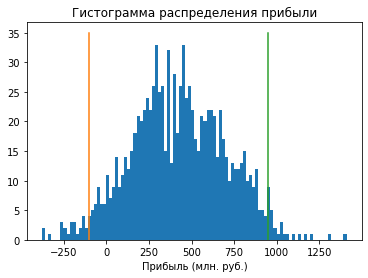

In [13]:
print('Показатели при случайном выборе 500 скважин по Региону 1')
print()
income_distribution(predictions_valid_0, target_valid_0, bootstrap_samples, explore_point_count)


Показатели при случайном выборе 500 скважин по Региону 2

count = 10



0    299.359372
1    382.831548
2    303.651161
3    658.190210
4    358.573613
dtype: float64

995    755.968347
996    766.728918
997    358.511413
998    509.843607
999    174.524307
dtype: float64


Среднее значение прибыли: 515.22 млн. рублей

95%-ый доверительный интервал:( 68.87322537050254, 931.547591257049 )

Вероятность убытков равна 1.00% и является меньше допустимой, данный регион подходит по критериям


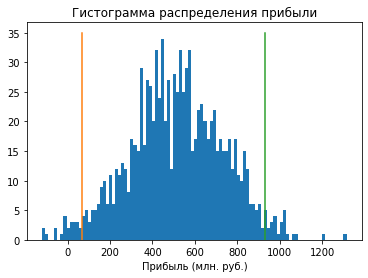

In [14]:
print('Показатели при случайном выборе 500 скважин по Региону 2')
print()
income_distribution (predictions_valid_1, target_valid_1, bootstrap_samples, explore_point_count)


Показатели при случайном выборе 500 скважин по Региону 3

count = 64



0    -95.044177
1    728.210597
2    611.217813
3    582.754149
4     25.014579
dtype: float64

995    566.865968
996    -11.648065
997    645.595218
998    536.735982
999    121.270210
dtype: float64


Среднее значение прибыли: 435.01 млн. рублей

95%-ый доверительный интервал:( -128.88054732978893, 969.7069541802657 )

Вероятность убытков равна 6.40% и является больше допустимой, регион не подходит по критериям


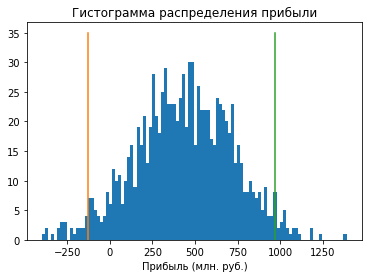

In [15]:
print('Показатели при случайном выборе 500 скважин по Региону 3')
print()
income_distribution (predictions_valid_2, target_valid_2, bootstrap_samples, explore_point_count)


**Выводы:**

 
1. Согласно рассчетам, средние значения прибыли составили: регион 1 - 426 млн. рублей, регион 2 - 515 млн. рублей , регион 3 - 435 млн. рублей. 

2. **Регион 1** и **Регион 3** обладают очень высокой вероятностью убытков (6 и 6.4 % соответственно) и не соответствуют условиям установленной бизнес-задачи (вероятность убытков не менее 2,5 %). Данную ситуацию наглядно описывают гистограммы распределения прибыли с 95-% доверительным интервалом. Левая граница обоих регионов принимает отрицательное значение, что говорит о том, что более 2.5 % подвыборок имеют отрицательную прибыль.

3. **Регион 2 соответствует условиям поставленной задачи и рекомендован для дальнейшей разработки**. Среднее значение прибыли: 515.22 млн. рублей, является наибольшим среди трех регионов., а также единственный соответствует условию по минимальной вероятности убытков (левая граница 95-% доверительного интервала - положительная). 

   Замечание: 
   При случайном выборе 500 исследуемых скважин , потенциальная прибыль падает в среднем в 6 раз (с 3 до 0,5 млрд.руб.) по сравнению с исследованием 25тыс. скважин. Вероятно, стоит  рассматривать  бюджет разработки скважин отдельно от бюджета разведки (исследования).